In [ ]:
# -*- coding: utf-8 -*-
from __future__ import print_function, division
from __future__ import absolute_import

import argparse
import sys
import numpy as np
import cv2
import os
from PIL import Image
from PIL import ImageDraw
from PIL import ImageFont
import json
import collections
import matplotlib.pyplot as plt

from tensorflow import keras
from keras.datasets import mnist
from keras.layers import Input, Dense, Reshape, Flatten, Dropout, multiply
from keras.layers import BatchNormalization, Activation, Embedding, ZeroPadding2D
from keras.layers.advanced_activations import LeakyReLU
from keras.layers.convolutional import UpSampling2D, Conv2D
from keras.models import Sequential, Model
from keras.optimizers import Adam

from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
def crop_image(img):
    image = np.array(img)
    blur = cv2.GaussianBlur(image, ksize=(3,3), sigmaX=0)
    ret, thresh1 = cv2.threshold(blur, 127, 255, cv2.THRESH_BINARY)
    edged = cv2.Canny(blur, 10, 250)
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (7,7))
    closed = cv2.morphologyEx(edged, cv2.MORPH_CLOSE, kernel)
    contours, _ = cv2.findContours(closed.copy(),cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    total = 0
    contours_xy = np.array(contours)
    x_min, x_max = 0,0
    value = list()
    for i in range(len(contours_xy)):
      for j in range(len(contours_xy[i])):
        value.append(contours_xy[i][j][0][0])
        x_min = min(value)
        x_max = max(value)
 
    y_min, y_max = 0,0
    value = list()
    for i in range(len(contours_xy)):
      for j in range(len(contours_xy[i])):
        value.append(contours_xy[i][j][0][1])
        y_min = min(value)
        y_max = max(value)

    x = x_min
    y = y_min
    w = x_max-x_min
    h = y_max-y_min

    return x, y, w, h

def process_image(img, x, y, w, h, canvas_size):
    new_width = 70
    new_height = int(70 * h / w)
    if new_height > 99:
        new_height = 90
        new_width = int(90 * w / h)
    img = img.crop((x-1, y-1, x+w+1, y+h+1)).resize((new_width,new_height))
    new_left = int((128 - img.width) / 2)
    new_top = int((128 - img.height) / 2)
    result = Image.new("L", (canvas_size, canvas_size), color=255)
    result.paste(img, (new_left, new_top))

    return result

In [ ]:
def draw_single_char(ch, font, canvas_size, x_offset, y_offset):
    img = Image.new("L", (150, 150), color=255)
    draw = ImageDraw.Draw(img)
    draw.text((x_offset, y_offset), ch, fill=(0), font=font, stroke_width=2, stroke_fill="black")
    x, y, w, h = crop_image(img)
    img = process_image(img, x, y, w, h, canvas_size)
    return img


def font2img(ttf, charset, char_size, canvas_size, x_offset, y_offset):
    global X_train, y_train
    font = ImageFont.truetype(ttf, size=char_size)
    count = 0
    for c in charset[432:560]:
        e = draw_single_char(c, font, canvas_size, x_offset, y_offset)
        if e:
            X_train.append(np.array(e))
            y_train.append(count)
            count += 1

In [ ]:
path = './gdrive/MyDrive/hangul/ttf/'
fonts = os.listdir(path)
f = open("./gdrive/MyDrive/hangul/2350-common-hangul.txt", 'r', encoding='cp949')
charset = f.readlines()
char_size, canvas_size = 100, 128
x_offset, y_offset = 10, 10
label = 1
X_train = []
y_train = []

for font in fonts[:]:
    font2img(path + font, charset, char_size, canvas_size, x_offset, y_offset)
    print('font#%02d 데이터셋 생성 완료' % (label))
    label += 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  # Remove the CWD from sys.path while we load stuff.


font#01 데이터셋 생성 완료
font#02 데이터셋 생성 완료
font#03 데이터셋 생성 완료
font#04 데이터셋 생성 완료
font#05 데이터셋 생성 완료
font#06 데이터셋 생성 완료
font#07 데이터셋 생성 완료
font#08 데이터셋 생성 완료
font#09 데이터셋 생성 완료
font#10 데이터셋 생성 완료
font#11 데이터셋 생성 완료
font#12 데이터셋 생성 완료
font#13 데이터셋 생성 완료
font#14 데이터셋 생성 완료
font#15 데이터셋 생성 완료
font#16 데이터셋 생성 완료
font#17 데이터셋 생성 완료
font#18 데이터셋 생성 완료
font#19 데이터셋 생성 완료
font#20 데이터셋 생성 완료
font#21 데이터셋 생성 완료
font#22 데이터셋 생성 완료
font#23 데이터셋 생성 완료
font#24 데이터셋 생성 완료
font#25 데이터셋 생성 완료
font#26 데이터셋 생성 완료
font#27 데이터셋 생성 완료
font#28 데이터셋 생성 완료
font#29 데이터셋 생성 완료
font#30 데이터셋 생성 완료
font#31 데이터셋 생성 완료
font#32 데이터셋 생성 완료
font#33 데이터셋 생성 완료
font#34 데이터셋 생성 완료
font#35 데이터셋 생성 완료
font#36 데이터셋 생성 완료
font#37 데이터셋 생성 완료
font#38 데이터셋 생성 완료
font#39 데이터셋 생성 완료
font#40 데이터셋 생성 완료
font#41 데이터셋 생성 완료
font#42 데이터셋 생성 완료
font#43 데이터셋 생성 완료
font#44 데이터셋 생성 완료
font#45 데이터셋 생성 완료
font#46 데이터셋 생성 완료
font#47 데이터셋 생성 완료
font#48 데이터셋 생성 완료
font#49 데이터셋 생성 완료
font#50 데이터셋 생성 완료
font#51 데이터셋 생성 완료
font#52 데이터셋 생성 완료
font#53 데이터셋

In [ ]:
class CGAN():
    def __init__(self):
        self.img_rows = 128
        self.img_cols = 128
        self.channels = 1
        self.img_shape = (self.img_rows, self.img_cols, self.channels)
        self.num_classes = 128
        self.latent_dim = 100

        optimizer = Adam(0.0002, 0.5)

        # discriminator 생성
        self.discriminator = self.build_discriminator()
        self.discriminator.compile(loss=['binary_crossentropy'],
            optimizer=optimizer,
            metrics=['accuracy'])

        # generator 생성
        self.generator = self.build_generator()

        # generator에 noise값과 label을 input으로 줌
        noise = Input(shape=(self.latent_dim,))
        label = Input(shape=(1,))
        img = self.generator([noise, label])

        self.discriminator.trainable = False

        # discriminator에 생성된 이미지와 label을 input으로 줌
        valid = self.discriminator([img, label])

        # generator와 discriminator를 합친 combined 모델 생성
        self.combined = Model([noise, label], valid)
        self.combined.compile(loss=['binary_crossentropy'],
            optimizer=optimizer)


    def build_generator(self):

        model = Sequential()

        model.add(Dense(256, input_dim=self.latent_dim))
        model.add(LeakyReLU(alpha=0.2))
        model.add(BatchNormalization(momentum=0.8))
        model.add(Dense(512))
        model.add(LeakyReLU(alpha=0.2))
        model.add(BatchNormalization(momentum=0.8))
        model.add(Dense(1024))
        model.add(LeakyReLU(alpha=0.2))
        model.add(BatchNormalization(momentum=0.8))
        model.add(Dense(np.prod(self.img_shape), activation='tanh'))
        model.add(Reshape(self.img_shape))

        noise = Input(shape=(self.latent_dim,))
        label = Input(shape=(1,), dtype='int32')
        label_embedding = Flatten()(Embedding(self.num_classes, self.latent_dim)(label))

        model_input = multiply([noise, label_embedding])
        img = model(model_input)

        return Model([noise, label], img)


    def build_discriminator(self):

        model = Sequential()

        model.add(Dense(512, input_dim=np.prod(self.img_shape)))
        model.add(LeakyReLU(alpha=0.2))
        model.add(Dense(512))
        model.add(LeakyReLU(alpha=0.2))
        model.add(Dropout(0.4))
        model.add(Dense(512))
        model.add(LeakyReLU(alpha=0.2))
        model.add(Dropout(0.4))
        model.add(Dense(1, activation='sigmoid'))

        img = Input(shape=self.img_shape)
        label = Input(shape=(1,), dtype='int32')
        label_embedding = Flatten()(Embedding(self.num_classes, np.prod(self.img_shape))(label))
        flat_img = Flatten()(img)

        model_input = multiply([flat_img, label_embedding])
        validity = model(model_input)

        return Model([img, label], validity)


    def train(self, epochs, batch_size, sample_interval):
        global X_train, y_train

        # 이미지, 라벨 configure
        X_train = np.array(X_train)
        y_train = np.array(y_train)
        X_train = (X_train.astype(np.float32) - 127.5) / 127.5
        X_train = np.expand_dims(X_train, axis=3)
        y_train = y_train.reshape(-1, 1)

        valid = np.ones((batch_size, 1))
        fake = np.zeros((batch_size, 1))

        for epoch in range(epochs):

            # 학습 데이터(이미지)에서 batch_size만큼의 랜덤 데이터 뽑기
            idx = np.random.randint(0, X_train.shape[0], batch_size)
            imgs, labels = X_train[idx], y_train[idx]

            # noise 입력값 생성
            noise = np.random.normal(0, 1, (batch_size, 100))

            # generator로 새로운 이미지 생성
            gen_imgs = self.generator.predict([noise, labels])

            # discriminator 학습
            d_loss_real = self.discriminator.train_on_batch([imgs, labels], valid)
            d_loss_fake = self.discriminator.train_on_batch([gen_imgs, labels], fake)
            d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

            # 학습 데이터(라벨)에서 batch_size만큼의 랜덤 데이터 뽑기
            sampled_labels = np.random.randint(0, 128, batch_size).reshape(-1, 1)

            # generator 학습
            g_loss = self.combined.train_on_batch([noise, sampled_labels], valid)

            # loss 값 출력 및 진행상황 확인
            print ("%d [D loss: %f, acc.: %.2f%%] [G loss: %f]" % (epoch, d_loss[0], 100*d_loss[1], g_loss))

            # sample_interval마다 이미지 저장
            if epoch % sample_interval == 0:
                self.sample_images(epoch)

    def sample_images(self, epoch):
        r, c = 4, 5
        noise = np.random.normal(0, 1, (r * c, 100))
        sampled_labels = np.arange(0, 20).reshape(-1, 1)

        gen_imgs = self.generator.predict([noise, sampled_labels])

        gen_imgs = 0.5 * gen_imgs + 0.5

        fig, axs = plt.subplots(r, c)
        cnt = 0
        for i in range(r):
            for j in range(c):
                axs[i,j].imshow(gen_imgs[cnt,:,:,0], cmap='gray')
                axs[i,j].axis('off')
                cnt += 1
        fig.savefig("images/%05d.png" % epoch)
        plt.close()


cgan = CGAN()
cgan.train(epochs=20000, batch_size=500, sample_interval=100)


스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
9167 [D loss: 0.088206, acc.: 96.70%] [G loss: 5.608540]
9168 [D loss: 0.141601, acc.: 95.50%] [G loss: 5.726704]
9169 [D loss: 0.118496, acc.: 95.90%] [G loss: 5.811703]
9170 [D loss: 0.105189, acc.: 95.60%] [G loss: 5.444130]
9171 [D loss: 0.115726, acc.: 94.90%] [G loss: 5.754460]
9172 [D loss: 0.101289, acc.: 96.30%] [G loss: 5.823442]
9173 [D loss: 0.118423, acc.: 95.50%] [G loss: 6.069149]
9174 [D loss: 0.105279, acc.: 95.90%] [G loss: 5.767943]
9175 [D loss: 0.089784, acc.: 96.40%] [G loss: 5.805095]
9176 [D loss: 0.085845, acc.: 96.50%] [G loss: 5.883908]
9177 [D loss: 0.106102, acc.: 96.00%] [G loss: 5.662763]
9178 [D loss: 0.090632, acc.: 96.00%] [G loss: 5.892624]
9179 [D loss: 0.110327, acc.: 96.20%] [G loss: 5.783352]
9180 [D loss: 0.098330, acc.: 96.20%] [G loss: 5.726284]
9181 [D loss: 0.078604, acc.: 97.70%] [G loss: 5.787342]
9182 [D loss: 0.123096, acc.: 96.00%] [G loss: 5.814002]
9183 [D loss: 0.098036, acc.: 96.80%] [G loss: 5.895

In [ ]:
# generator 모델 저장
!mkdir -p saved_model
cgan.generator.save('./gdrive/MyDrive/hangul/models/d-generator')

INFO:tensorflow:Assets written to: ./gdrive/MyDrive/hangul/models/d-generator/assets


[[19]]
댁

(1, 128, 128, 1)
<class 'numpy.ndarray'>


(-0.5, 127.5, 127.5, -0.5)

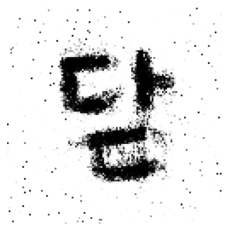

In [ ]:
# 모델 복원해서 입력한 라벨대로 글자 생성
model_name = './gdrive/MyDrive/hangul/models/d-generator'
new_model = keras.models.load_model(model_name)

a = 19
noise = np.random.normal(0, 1, (1, 100))
sampled_labels = np.arange(a, a+1).reshape(-1, 1)

gen_imgs = new_model.predict([noise, sampled_labels])
gen_imgs = 0.5 * gen_imgs + 0.5

plt.imshow(gen_imgs[0, :, :, 0], cmap='gray')
plt.axis('off')

In [ ]:
pip install -q imageio

In [ ]:
import glob
import imageio

In [ ]:
# 모델 훈련 과정 gif 파일로 저장
anim_file = 'hangul-d.gif'

with imageio.get_writer(anim_file, mode='I') as writer:
  filenames = glob.glob('./images/*.png')
  filenames = sorted(filenames)
  last = -1
  for i,filename in enumerate(filenames):
    frame = 2*(i**0.5)
    if round(frame) > round(last):
      last = frame
    else:
      continue
    image = imageio.imread(filename)
    writer.append_data(image)
  image = imageio.imread(filename)
  writer.append_data(image)

import IPython
if IPython.version_info > (6,2,0,''):
  display.Image(filename=anim_file)

In [ ]:
try:
  from google.colab import files
except ImportError:
  pass
else:
  files.download(anim_file)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>